# Task 23-> Regression Models using scikit-learn

## Importing Necessary Libraries
First, let's import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet, LassoCV, ElasticNetCV, RidgeCV
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

### Load the California Housing dataset

In [2]:
california_data = fetch_california_housing()
X_california, y_california = california_data.data, california_data.target
print("California Housing Dataset loaded.")
print(f"Features shape: {X_california.shape}, Target shape: {y_california.shape}")

California Housing Dataset loaded.
Features shape: (20640, 8), Target shape: (20640,)


### View the first few rows of the dataset


In [3]:
print("First few rows of the California Housing dataset:")
pd.DataFrame(X_california, columns=california_data.feature_names).head()

First few rows of the California Housing dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Check for missing values


In [4]:
print("Check for missing values in California Housing dataset:")
pd.DataFrame(X_california, columns=california_data.feature_names).isnull().sum()

Check for missing values in California Housing dataset:


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

### Split the dataset into training and testing sets

In [5]:
X_california_train, X_california_test, y_california_train, y_california_test = train_test_split(X_california, y_california, test_size=0.2, random_state=42)
print("California Housing dataset split into training and testing sets.")

California Housing dataset split into training and testing sets.


### Standardize the dataset

In [6]:
scaler_california = StandardScaler()

In [7]:
X_california_train = scaler_california.fit_transform(X_california_train)
X_california_test = scaler_california.transform(X_california_test)
print("California Housing dataset standardized.")

California Housing dataset standardized.


# 1. SGD Regressor (Stochastic Gradient Descent Regressor)
### Overview: 
An iterative method for optimizing an objective function with suitable smoothness properties.
### Use Case: 
Preferred for datasets with more than 50 samples and where feature importance is not a significant concern.

## Types:
## A. Ordinary SGD: 
Basic form with linear learning rate schedule.

In [8]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)

In [9]:
sgd_regressor.fit(X_california_train, y_california_train)
y_california_pred_sgd = sgd_regressor.predict(X_california_test)
print("Ordinary SGD Regressor MSE:", mean_squared_error(y_california_test, y_california_pred_sgd))

Ordinary SGD Regressor MSE: 0.5964004006356285


### Plot results for Ordinary SGD Regressor


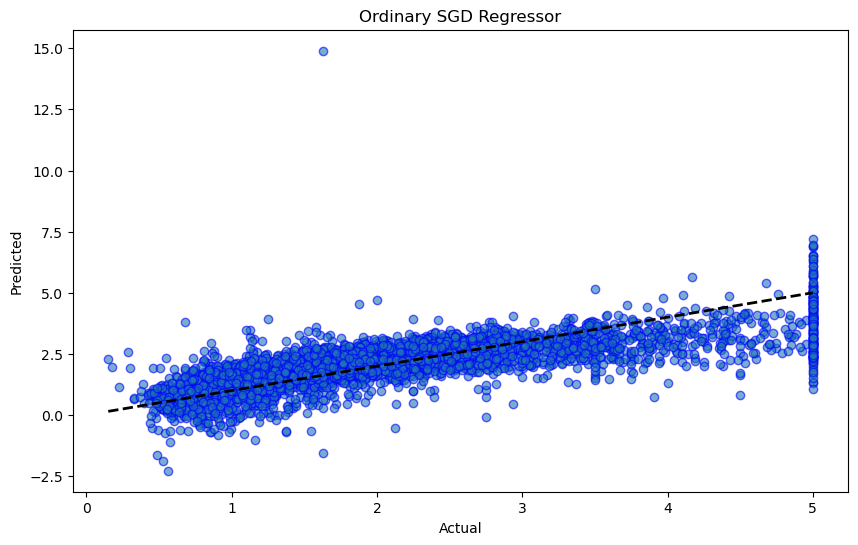

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_sgd, edgecolors='blue', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ordinary SGD Regressor")
plt.show()

## B. Mini-batch SGD: 
Uses a small random sample of the data for each iteration.

In [11]:
sgd_regressor_mini_batch = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='optimal')

In [12]:
sgd_regressor_mini_batch.fit(X_california_train, y_california_train)
y_california_pred_sgd_mini_batch = sgd_regressor_mini_batch.predict(X_california_test)
print("Mini-batch SGD Regressor MSE:", mean_squared_error(y_california_test, y_california_pred_sgd_mini_batch))

Mini-batch SGD Regressor MSE: 3.040006308039733e+22


### Plot results for Mini-batch SGD Regressor


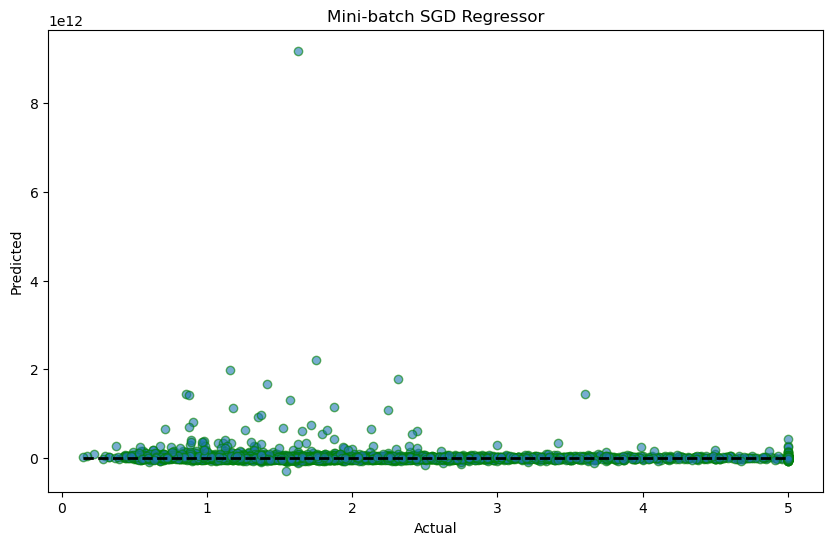

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_sgd_mini_batch, edgecolors='green', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Mini-batch SGD Regressor")
plt.show()

## C. Stochastic Average Gradient (SAG): 
Combines the benefits of SGD and full gradient descent.

In [14]:
sgd_regressor_sag = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant')

In [15]:
sgd_regressor_sag.fit(X_california_train, y_california_train)
y_california_pred_sgd_sag = sgd_regressor_sag.predict(X_california_test)
print("SAG Regressor MSE:", mean_squared_error(y_california_test, y_california_pred_sgd_sag))

SAG Regressor MSE: 4.448136047570462e+21


### Plot results for SAG Regressor


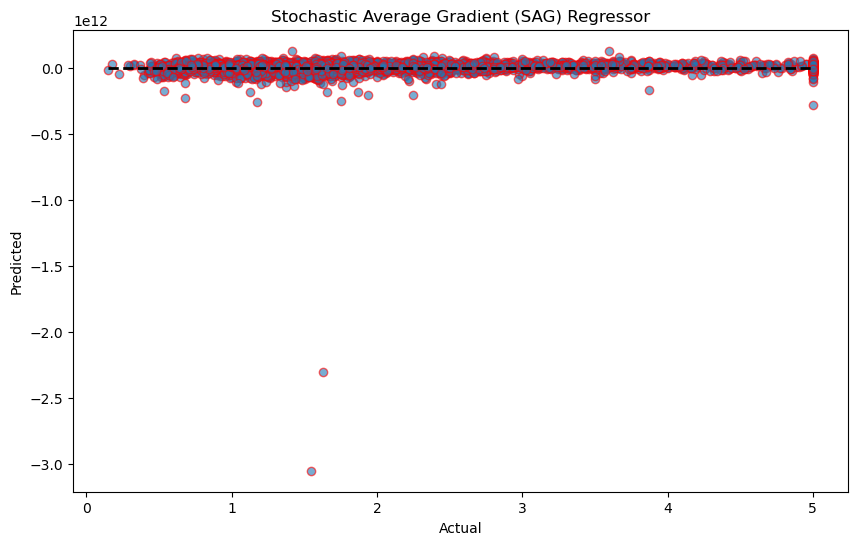

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_sgd_sag, edgecolors='red', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Stochastic Average Gradient (SAG) Regressor")
plt.show()

# 2. Lasso (Least Absolute Shrinkage and Selection Operator)
### Overview: 
A regression analysis method that performs both variable selection and regularization to enhance the prediction accuracy.
### Use Case: 
Effective when the number of features is large and only a few are expected to be important.


### Load the Diabetes dataset


In [17]:
diabetes_data = load_diabetes()
X_diabetes, y_diabetes = diabetes_data.data, diabetes_data.target
print("Diabetes Dataset loaded.")
print(f"Features shape: {X_diabetes.shape}, Target shape: {y_diabetes.shape}")

Diabetes Dataset loaded.
Features shape: (442, 10), Target shape: (442,)


### View the first few rows of the dataset


In [18]:
print("First few rows of the Diabetes dataset:")
pd.DataFrame(X_diabetes, columns=diabetes_data.feature_names).head()

First few rows of the Diabetes dataset:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Check for missing values

In [19]:
print("Check for missing values in Diabetes dataset:")
pd.DataFrame(X_diabetes, columns=diabetes_data.feature_names).isnull().sum()

Check for missing values in Diabetes dataset:


age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

### Split the dataset into training and testing sets


In [20]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)
print("Diabetes dataset split into training and testing sets.")

Diabetes dataset split into training and testing sets.


## Types:
## A. Standard Lasso Regressor: 
Uses L1 penalty for feature selection.

In [21]:
lasso_regressor = Lasso(alpha=0.1)

In [22]:
lasso_regressor.fit(X_diabetes_train, y_diabetes_train)
y_diabetes_pred_lasso = lasso_regressor.predict(X_diabetes_test)
print("Standard Lasso Regressor MSE:", mean_squared_error(y_diabetes_test, y_diabetes_pred_lasso))

Standard Lasso Regressor MSE: 2798.1934851697188


### Plot results for Standard Lasso Regressor


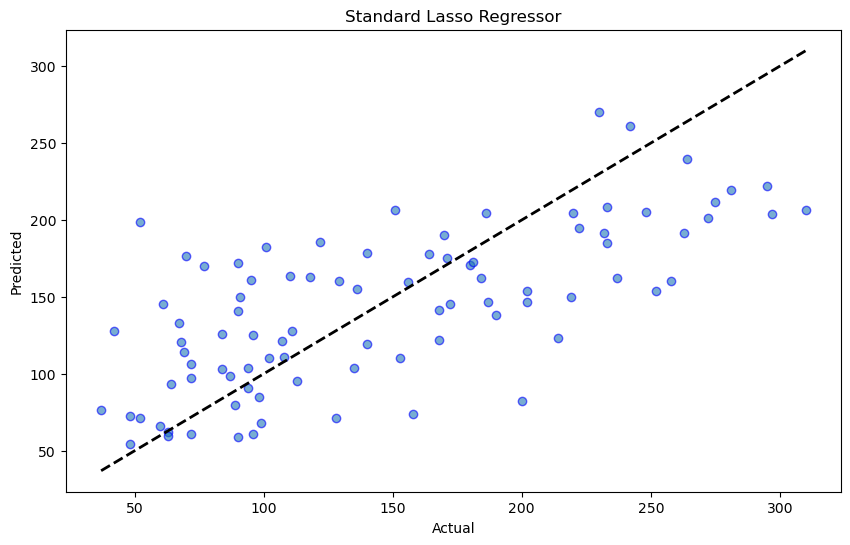

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_diabetes_test, y_diabetes_pred_lasso, edgecolors='blue', alpha=0.6)
plt.plot([y_diabetes_test.min(), y_diabetes_test.max()], [y_diabetes_test.min(), y_diabetes_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Standard Lasso Regressor")
plt.show()

## B. Adaptive Lasso(using a custom approach):
Weights different coefficients differently.

In [24]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_diabetes_train, y_diabetes_train)
initial_weights = np.abs(lasso_cv.coef_)
epsilon = 1e-6  # Small constant to avoid division by zero

In [25]:
adaptive_lasso_regressor = Lasso(alpha=0.1)

In [26]:
adaptive_lasso_regressor.fit(X_diabetes_train / (initial_weights + epsilon), y_diabetes_train)
y_diabetes_pred_adaptive_lasso = adaptive_lasso_regressor.predict(X_diabetes_test / (initial_weights + epsilon))
print("Adaptive Lasso Regressor MSE:", mean_squared_error(y_diabetes_test, y_diabetes_pred_adaptive_lasso))

Adaptive Lasso Regressor MSE: 4387.729455978781


### Plot results for Adaptive Lasso Regressor


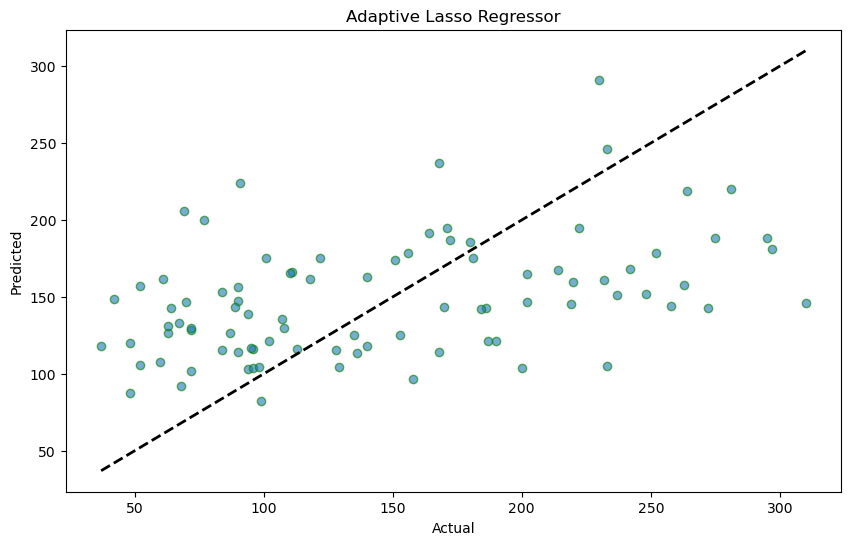

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_diabetes_test, y_diabetes_pred_adaptive_lasso, edgecolors='green', alpha=0.6)
plt.plot([y_diabetes_test.min(), y_diabetes_test.max()], [y_diabetes_test.min(), y_diabetes_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Adaptive Lasso Regressor")
plt.show()

# 3. ElasticNet
### Overview: 
Combines the penalties of Lasso and Ridge regression.
### Use Case: 
When there are multiple correlated features and feature selection is necessary.

## Types:
## A. Standard ElasticNet: 
Balances L1 and L2 penalties.

In [28]:
elasticnet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [29]:
elasticnet_regressor.fit(X_california_train, y_california_train)
y_california_pred_elasticnet = elasticnet_regressor.predict(X_california_test)
print("Standard ElasticNet Regressor MSE:", mean_squared_error(y_california_test, y_california_pred_elasticnet))

Standard ElasticNet Regressor MSE: 0.6358566879910775


### Plot results for Standard ElasticNet Regressor


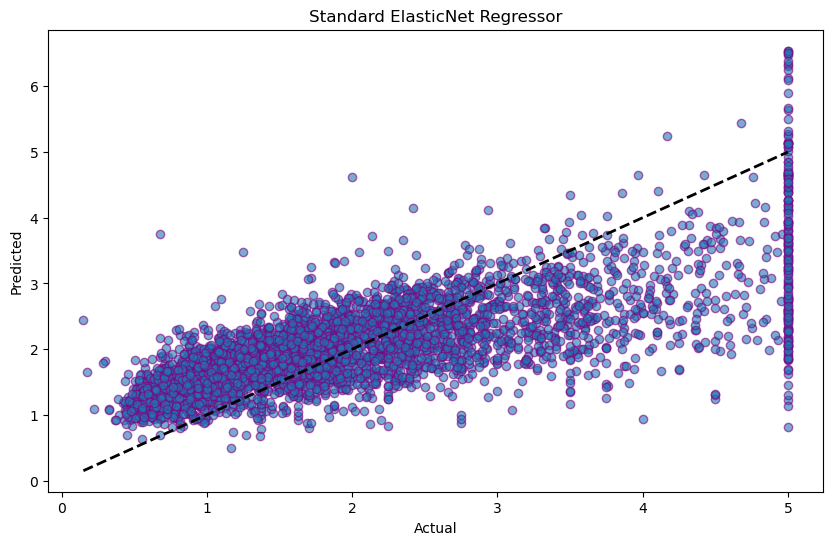

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_elasticnet, edgecolors='purple', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Standard ElasticNet Regressor")
plt.show()

## B. ElasticNet with Cross-Validation: 
Automatically tunes the mixing parameter using cross-validation.

In [31]:
elasticnet_cv_regressor = ElasticNetCV(cv=5)

In [32]:
elasticnet_cv_regressor.fit(X_california_train, y_california_train)
y_california_pred_elasticnet_cv = elasticnet_cv_regressor.predict(X_california_test)
print("ElasticNet with Cross-Validation MSE:", mean_squared_error(y_california_test, y_california_pred_elasticnet_cv))

ElasticNet with Cross-Validation MSE: 0.5543582155950634


### Plot results for ElasticNet with Cross-Validation


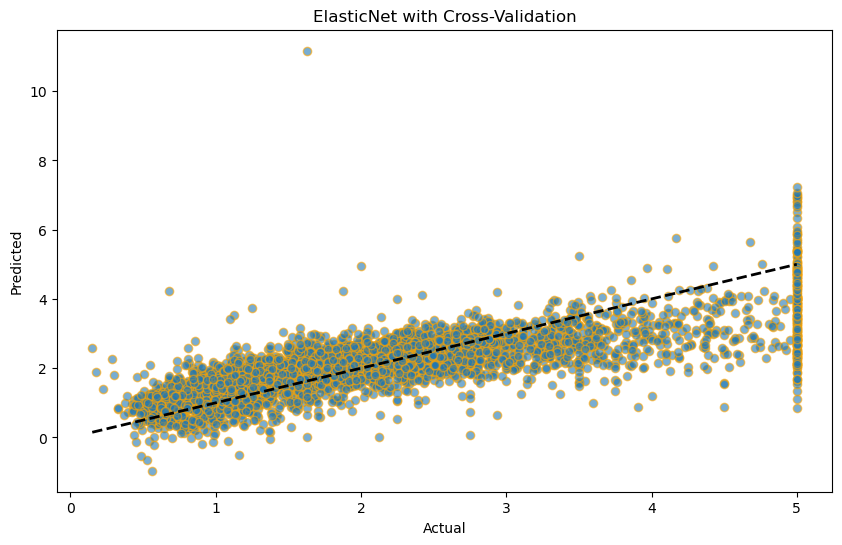

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_elasticnet_cv, edgecolors='orange', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("ElasticNet with Cross-Validation")
plt.show()

## 4. SVR (Support Vector Regression)
### Kernel='rbf':
#### Overview: 
Uses the Radial Basis Function kernel, which is effective in non-linear data spaces.
#### Use Case: 
Suitable for complex relationships between the dependent and independent variables.<br>
### Kernel='linear':
#### Overview: 
Uses a linear kernel, simpler than the RBF kernel.
#### Use Case: 
Suitable for linear relationships.<br>
## Types:
## A. Epsilon-SVR: 
Introduces a margin of tolerance with regard to errors.

### SVR with RBF kernel

In [34]:
svr_rbf_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.2)

In [35]:
svr_rbf_regressor.fit(X_california_train, y_california_train)
y_california_pred_svr_rbf = svr_rbf_regressor.predict(X_california_test)
print("SVR with RBF Kernel MSE:", mean_squared_error(y_california_test, y_california_pred_svr_rbf))

SVR with RBF Kernel MSE: 0.3551671046081892


### Plot results for SVR with RBF Kernel


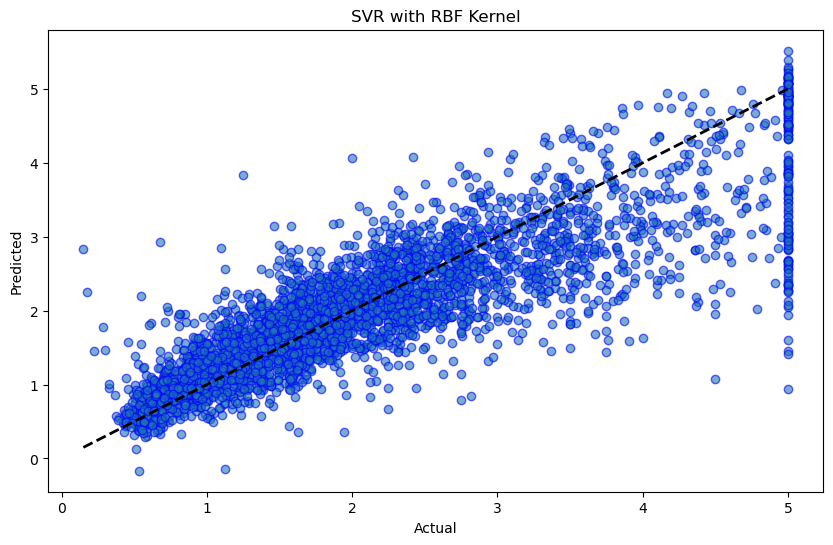

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_svr_rbf, edgecolors='blue', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("SVR with RBF Kernel")
plt.show()

### SVR with Linear kernel


In [37]:
svr_linear_regressor = SVR(kernel='linear', C=1.0)
svr_linear_regressor.fit(X_california_train, y_california_train)
y_california_pred_svr_linear = svr_linear_regressor.predict(X_california_test)
print("SVR with Linear Kernel MSE:", mean_squared_error(y_california_test, y_california_pred_svr_linear))

SVR with Linear Kernel MSE: 0.5792291127963858


### Plot results for SVR with Linear Kernel


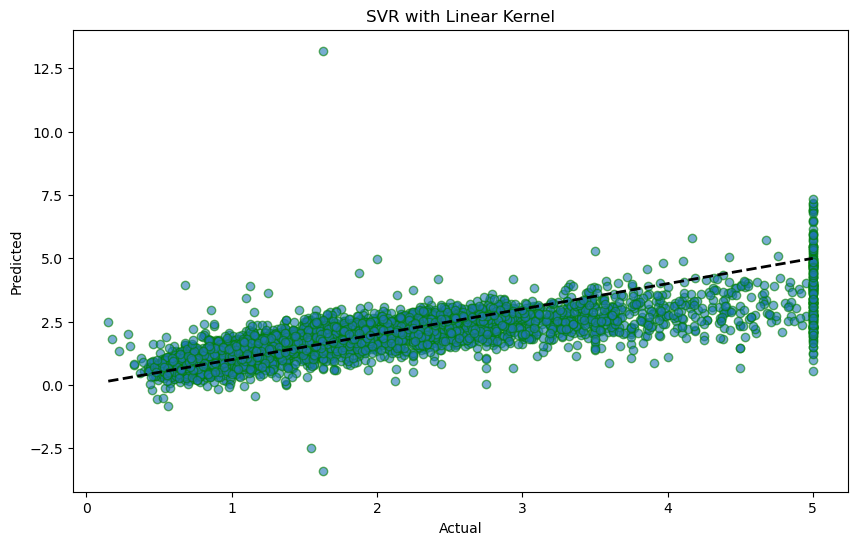

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_svr_linear, edgecolors='green', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("SVR with Linear Kernel")
plt.show()

## B. Nu-SVR: 
Provides an upper bound on the number of training errors.

### Nu-SVR with RBF kernel


In [39]:
nu_svr_rbf_regressor = NuSVR(kernel='rbf', C=1.0, nu=0.5)
nu_svr_rbf_regressor.fit(X_california_train, y_california_train)
y_california_pred_nu_svr_rbf = nu_svr_rbf_regressor.predict(X_california_test)
print("Nu-SVR with RBF Kernel MSE:", mean_squared_error(y_california_test, y_california_pred_nu_svr_rbf))

Nu-SVR with RBF Kernel MSE: 0.3535309909310128


### Plot results for Nu-SVR with RBF Kernel


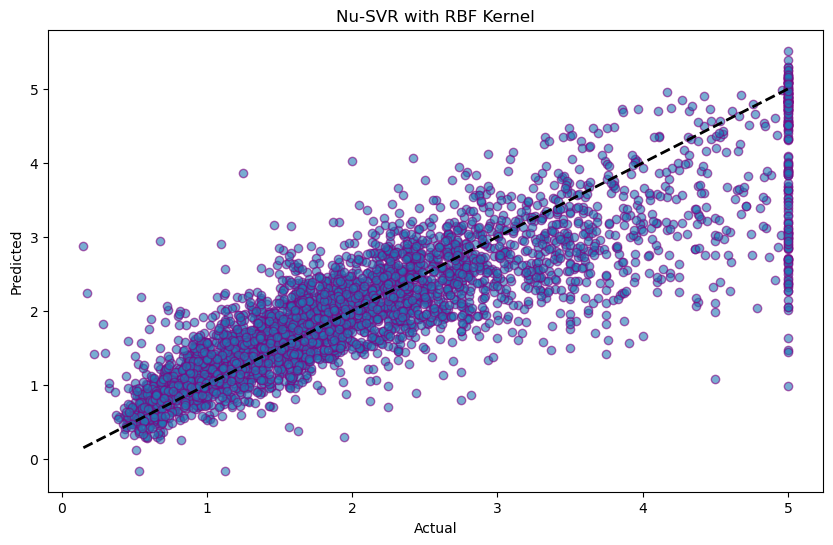

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_nu_svr_rbf, edgecolors='purple', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Nu-SVR with RBF Kernel")
plt.show()

### Nu-SVR with Linear kernel


In [41]:
nu_svr_linear_regressor = NuSVR(kernel='linear', C=1.0, nu=0.5)
nu_svr_linear_regressor.fit(X_california_train, y_california_train)
y_california_pred_nu_svr_linear = nu_svr_linear_regressor.predict(X_california_test)
print("Nu-SVR with Linear Kernel MSE:", mean_squared_error(y_california_test, y_california_pred_nu_svr_linear))

Nu-SVR with Linear Kernel MSE: 0.5707124941185924


### Plot results for Nu-SVR with Linear Kernel


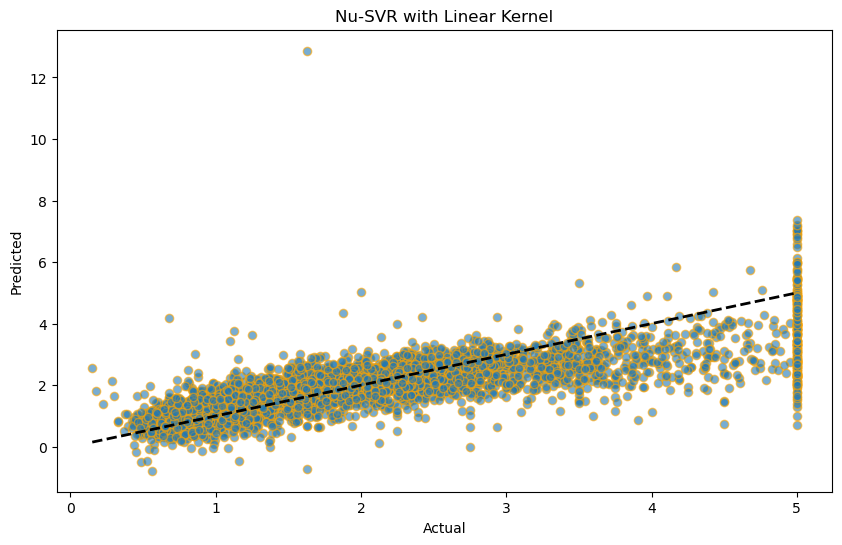

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_nu_svr_linear, edgecolors='orange', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Nu-SVR with Linear Kernel")
plt.show()

# 5. Ridge Regression
### Overview: 
Adds L2 penalty term to the cost function, which helps to shrink the coefficients and reduce multicollinearity.
### Use Case: 
Effective when the data has a lot of collinear variables.
## Types:
## A. Standard Ridge: 
Uses L2 penalty for shrinkage.

In [43]:
ridge_regressor = Ridge(alpha=1.0)

In [44]:
ridge_regressor.fit(X_diabetes_train, y_diabetes_train)
y_diabetes_pred_ridge = ridge_regressor.predict(X_diabetes_test)
print("Standard Ridge Regressor MSE:", mean_squared_error(y_diabetes_test, y_diabetes_pred_ridge))

Standard Ridge Regressor MSE: 3077.41593882723


### Plot results for Standard Ridge Regressor


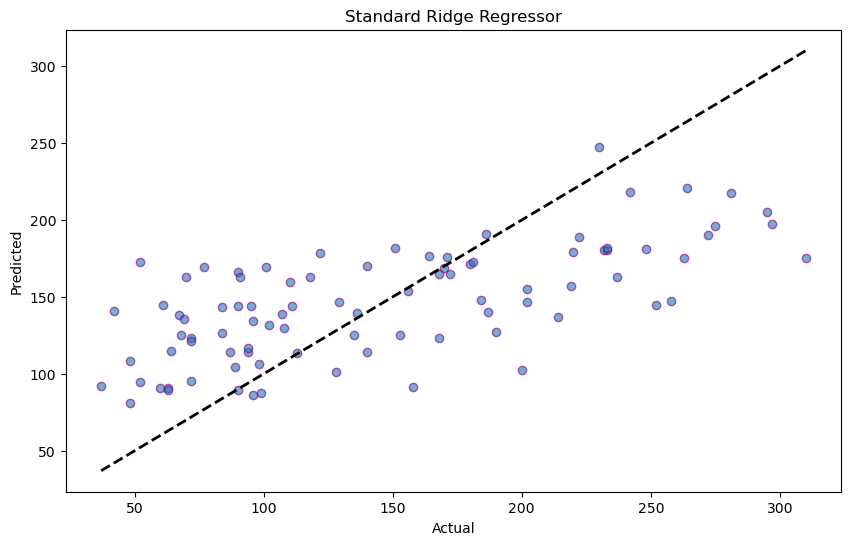

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_diabetes_test, y_diabetes_pred_ridge, edgecolors='purple', alpha=0.6)
plt.plot([y_diabetes_test.min(), y_diabetes_test.max()], [y_diabetes_test.min(), y_diabetes_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Standard Ridge Regressor")
plt.show()

## B. Ridge Regressor with Cross-Validation
Selects the regularization parameter using cross-validation.

In [46]:
ridge_cv_regressor = RidgeCV(cv=5)
ridge_cv_regressor.fit(X_diabetes_train, y_diabetes_train)
y_diabetes_pred_ridge_cv = ridge_cv_regressor.predict(X_diabetes_test)
print("Ridge with Cross-Validation MSE:", mean_squared_error(y_diabetes_test, y_diabetes_pred_ridge_cv))

Ridge with Cross-Validation MSE: 2856.4868876706537


### Plot results for Ridge with Cross-Validation


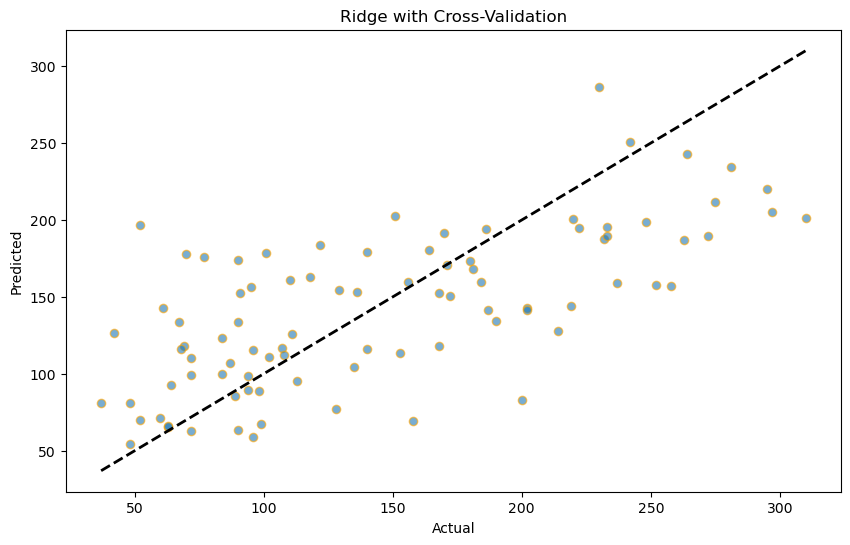

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_diabetes_test, y_diabetes_pred_ridge_cv, edgecolors='orange', alpha=0.6)
plt.plot([y_diabetes_test.min(), y_diabetes_test.max()], [y_diabetes_test.min(), y_diabetes_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ridge with Cross-Validation")
plt.show()

# 6. Ensemble Regressors
### Overview: 
Combine predictions from multiple regression models to improve accuracy.
### Use Case: 
When individual models are not sufficient and ensemble methods can improve performance.
## Types:
## A. Bagging Regressor: 
Combines the results of multiple models to reduce variance.

In [48]:
bagging_regressor = BaggingRegressor(n_estimators=10, random_state=42)

In [49]:
bagging_regressor.fit(X_california_train, y_california_train)
y_california_pred_bagging = bagging_regressor.predict(X_california_test)
print("Bagging Regressor MSE:", mean_squared_error(y_california_test, y_california_pred_bagging))

Bagging Regressor MSE: 0.2821629393691235


### Plot results for Bagging Regressor


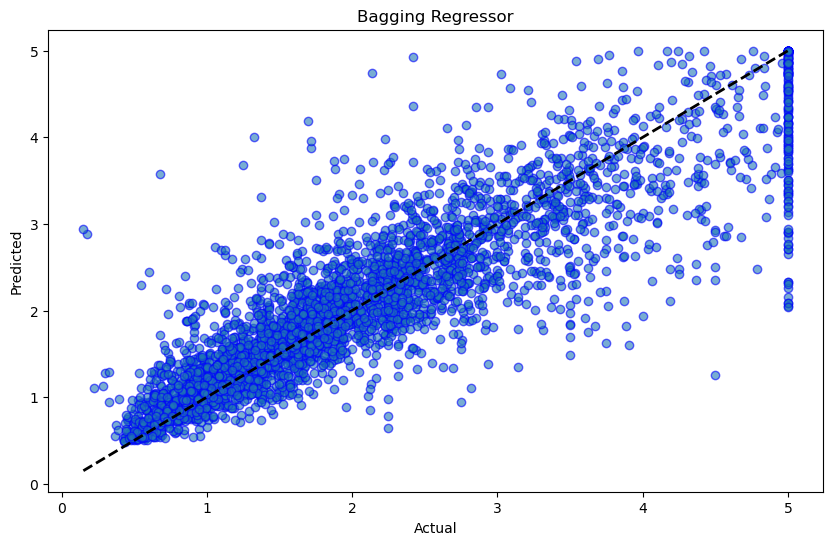

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_bagging, edgecolors='blue', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Bagging Regressor")
plt.show()

## B. Random Forest Regressor: 
Uses multiple decision trees to improve accuracy.

In [51]:
random_forest_regressor = RandomForestRegressor(n_estimators=10, random_state=42)

In [52]:
random_forest_regressor.fit(X_california_train, y_california_train)
y_california_pred_rf = random_forest_regressor.predict(X_california_test)
print("Random Forest Regressor MSE:", mean_squared_error(y_california_test, y_california_pred_rf))

Random Forest Regressor MSE: 0.28364877522100695


### Plot results for Random Forest Regressor


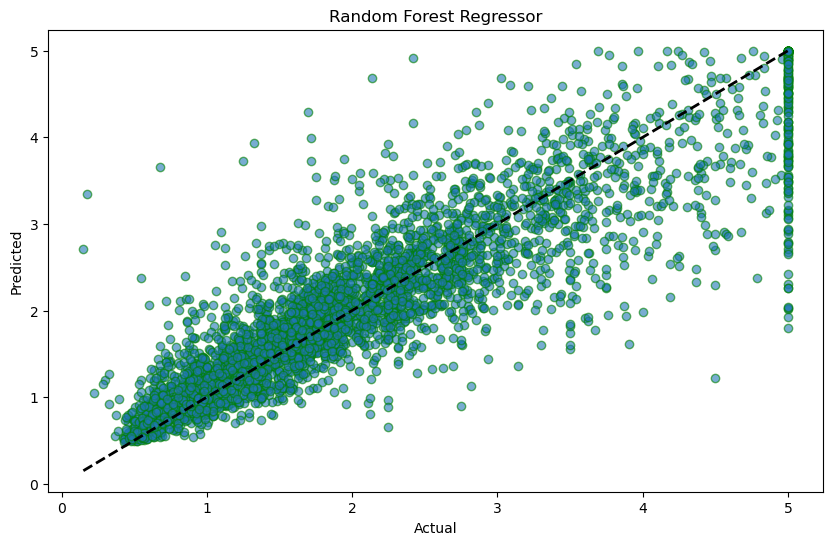

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_rf, edgecolors='green', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Random Forest Regressor")
plt.show()

## C. Gradient Boosting Regressor: 
Sequentially builds models to correct errors made by the previous models.

In [54]:
gbr_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [55]:
gbr_regressor.fit(X_california_train, y_california_train)
y_california_pred_gbr = gbr_regressor.predict(X_california_test)
print("Gradient Boosting Regressor MSE:", mean_squared_error(y_california_test, y_california_pred_gbr))

Gradient Boosting Regressor MSE: 0.29399901242474274


### Plot results for Gradient Boosting Regressor


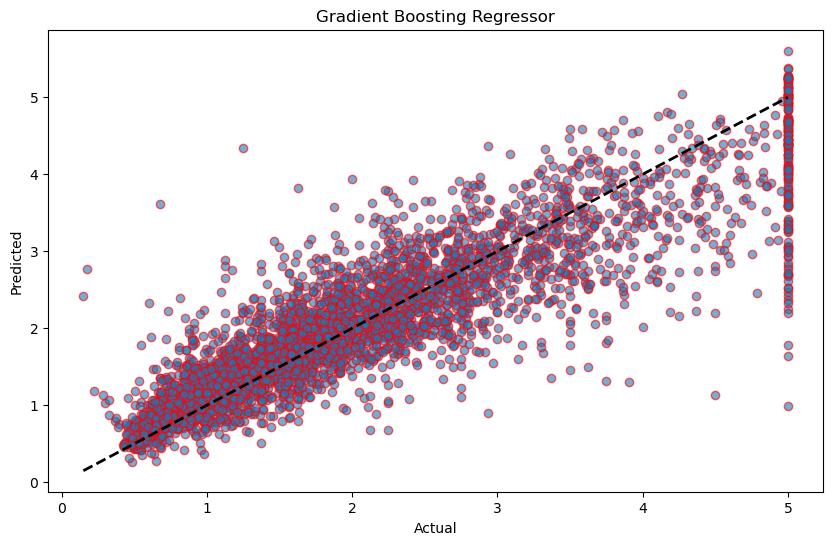

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_gbr, edgecolors='red', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Gradient Boosting Regressor")
plt.show()

## D. AdaBoost Regressor: 
Adjusts weights of weak models iteratively to improve performance

In [57]:
adaboost_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)

In [58]:
adaboost_regressor.fit(X_california_train, y_california_train)
y_california_pred_adaboost = adaboost_regressor.predict(X_california_test)
print("AdaBoost Regressor MSE:", mean_squared_error(y_california_test, y_california_pred_adaboost))

AdaBoost Regressor MSE: 0.614478459432694


### Plot results for AdaBoost Regressor


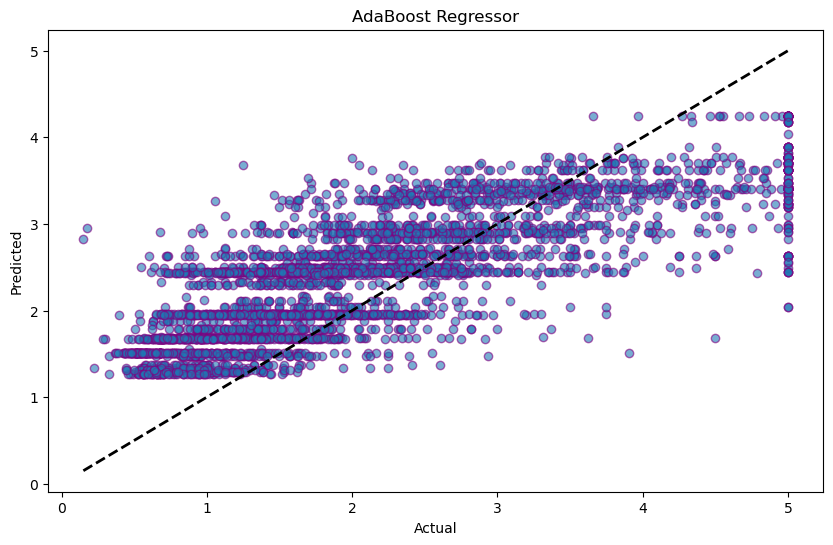

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_adaboost, edgecolors='purple', alpha=0.6)
plt.plot([y_california_test.min(), y_california_test.max()], [y_california_test.min(), y_california_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("AdaBoost Regressor")
plt.show()